# Data preprocessing
In this part of the notebook, we will preprocess the data to make it ready for training. We will do the following steps:
1. Visualize the RTM data
2. Check the sampling rate of the data and resample to consist to 16kHz to enssure uniformity across the dataset
3. Extract MFCC features from the audio data and allign with the RTM data to create the final dataset
 


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.5/159.5 kB 38.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 59.0 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 305.0/305.0 kB 122.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 219.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 164.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 130.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 67.1 MB/s eta 0:00:00


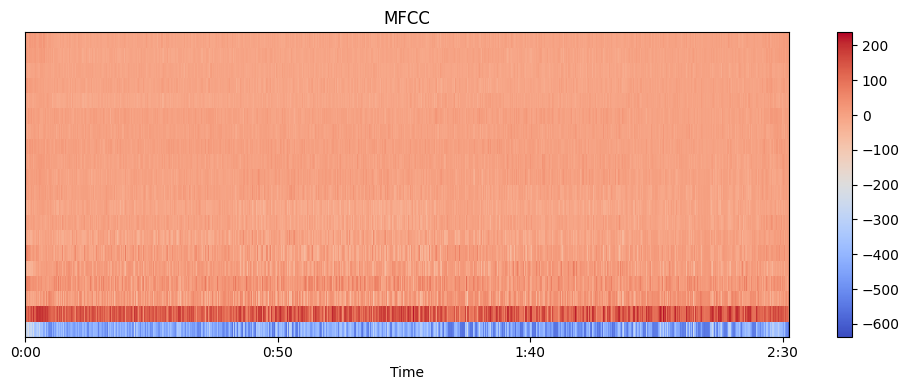

Hello remote


In [7]:
# Visualize the RTM data

# All importss
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import librosa as librosa

# Parse the dummy RTTM file
def parse_rttm(file_path):
    columns = [
        "Type",
        "File ID",
        "Channel ID",
        "Turn Onset",
        "Turn Duration",
        "Orthography Field",
        "Speaker Type",
        "Speaker Name",
        "Confidence Score",
        "Signal Lookahead Time",
    ]
    df = pd.read_csv(file_path, delim_whitespace=True, names=columns)
    return df[["Turn Onset", "Turn Duration", "Speaker Name"]]


# Prepare the parsed data
def prepare_data(rttm_data):
    rttm_data["Turn Onset"] = rttm_data["Turn Onset"].astype(float)
    rttm_data["Turn Duration"] = rttm_data["Turn Duration"].astype(float)
    rttm_data["End Time"] = rttm_data["Turn Onset"] + rttm_data["Turn Duration"]
    return rttm_data


# Plots the timeline of the speakers
def plot_timeline(data):
    fig, ax = plt.subplots(figsize=(12, 8))

    speakers = data["Speaker Name"].unique()
    speaker_indices = {speaker: idx for idx, speaker in enumerate(speakers)}

    for idx, row in data.iterrows():
        start = row["Turn Onset"]
        end = row["End Time"]
        speaker = row["Speaker Name"]
        ax.plot([start, end], [speaker_indices[speaker]] * 2, linewidth=10)

    ax.set_yticks(range(len(speakers)))
    ax.set_yticklabels(speakers)
    ax.set_xlabel("Time (s)")
    ax.set_ylabel("Speakers")
    ax.set_title("Speaker Timeline")

    plt.show()


def debugger_test():
    # Test the RTM data
    rttm_data = parse_rttm("../Dataset/RTMS/Dev/abjxc.rttm")
    rttm_data = prepare_data(rttm_data)
    plot_timeline(rttm_data)


def debugger_run_all():
    devRTM_path = "../Dataset/RTMS/Dev/"
    # Visaualize all RTM data in the folder devRTM_path

    # Get all the files in the folder
    files = os.listdir(devRTM_path)
    for file in files:
        if file.endswith(".rttm"):
            file_path = os.path.join(devRTM_path, file)
            rttm_data = parse_rttm(file_path)
            rttm_data = prepare_data(rttm_data)
            plot_timeline(rttm_data)

def get_mfcc(file_path):
    y, sr = librosa.load(file_path)
    mfcc = librosa.feature.mfcc(y=y, sr=sr)
    return mfcc

# Test get_mfcc on filepath
path = "../Dataset/Audio/Dev/afjiv.wav"

mfcc_test = get_mfcc(path)

# Visualize the MFCC data
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfcc_test, x_axis="time")
plt.colorbar()
plt.title("MFCC")
plt.tight_layout()
plt.show()

print("Hello remote")
